We conduct a comprehensive customer credit profile analysis as part of our evaluation process prior to issuing a credit card.

In [2]:
#import libraries
import mysql.connector
import pandas as pd
import seaborn as sns
import import_ipynb
from Customer_Data_Analysis import *
from matplotlib import pyplot as plt


In [3]:
#read customer credit_profiles data
df_credit_profiles.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [4]:
df_credit_profiles.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1004.000000,1004.000000,1000.000000,1000.000000,1000.000000,935.000000
mean,500.850598,588.655378,0.498950,9683.597000,1.955000,19235.561497
std,288.315670,152.575244,0.233139,25255.893671,1.414559,24489.997195
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000
25%,251.750000,459.000000,0.293917,221.000000,1.000000,750.000000
50%,502.500000,601.000000,0.487422,550.000000,2.000000,1250.000000
75%,749.250000,737.250000,0.697829,11819.500000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000


In [5]:
df_credit_profiles.shape

(1004, 6)

In [6]:
#Identify the unique records using nunique()
df_credit_profiles['cust_id'].nunique()

1000

In [7]:
#Identify duplicate records using duplicated()
df_credit_profiles[df_credit_profiles['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [8]:
#Delete duplicate records based on cust_id using drop_duplicates
df_credit_profiles_unique = df_credit_profiles.drop_duplicates(subset="cust_id",keep='last')
df_credit_profiles_unique.shape

(1000, 6)

In [9]:
#Identify the null values across the columns
df_credit_profiles_unique.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [10]:
#identify the records where credit limit is null
df_credit_profiles_unique[df_credit_profiles_unique.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [11]:
#check is there any relation in credit limit
df_credit_profiles_unique.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

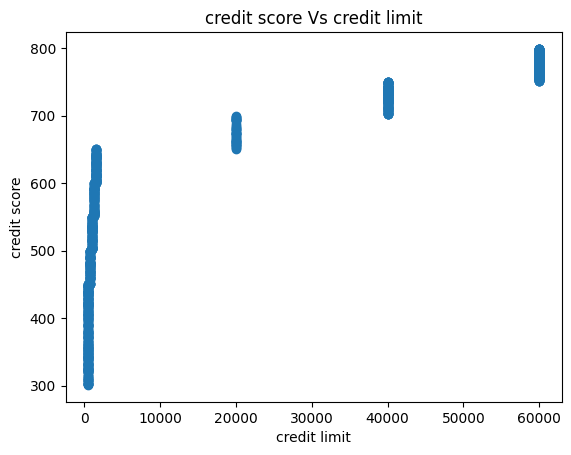

In [12]:
plt.scatter(df_credit_profiles_unique.credit_limit,df_credit_profiles_unique.credit_score)
plt.title('credit score Vs credit limit')
plt.xlabel('credit limit')
plt.ylabel('credit score')
plt.show()

In [13]:
bin_ranges = [300,450,500,550,600,650,700,750,800]
bin_labels = [f'{start}-{end-1}' for start,end in zip(bin_ranges,bin_ranges[1:])]

df_credit_profiles_unique['credit_score_range'] = pd.cut(df_credit_profiles_unique['credit_score'],bins=bin_ranges,labels=bin_labels,include_lowest=True,right=False)
df_credit_profiles_unique

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0,550-599
1000,997,774,0.465462,17139.0,0.0,60000.0,750-799
1001,998,529,0.585856,386.0,3.0,1000.0,500-549
1002,999,725,0.249670,6973.0,2.0,40000.0,700-749


In [14]:
df_credit_profiles_unique[df_credit_profiles_unique['credit_score_range']=='700-749']

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
6,7,747,0.523965,15544.0,4.0,40000.0,700-749
16,17,702,0.894423,18444.0,0.0,40000.0,700-749
27,28,729,0.149748,3453.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
969,966,720,0.203742,6159.0,4.0,40000.0,700-749
970,967,739,0.845474,23929.0,4.0,40000.0,700-749
991,988,739,0.435891,9283.0,4.0,40000.0,700-749
994,991,709,0.718484,15473.0,4.0,40000.0,700-749


In [15]:
# Ready made Mode() is not available. Hence, define lambda function using agg()
# iloc() used to pick first value if it return 2 values
# reset_index() is used to convert series to data frame
mode_df = df_credit_profiles_unique.groupby('credit_score_range')['credit_limit'].agg(lambda x:x.mode().iloc[0]).reset_index()
mode_df

,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [16]:
df_credit_profiles_unique[df_credit_profiles_unique.credit_limit.isnull()].head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
10,11,679,0.557450,9187.0,2.0,NaN,650-699
35,36,790,0.112535,4261.0,1.0,NaN,750-799
37,38,514,0.296971,238.0,2.0,NaN,500-549
45,46,761,0.596041,24234.0,2.0,NaN,750-799
64,65,734,0.473715,13631.0,0.0,NaN,700-749


In [17]:
# suffixes is used to rename the credit_limit column name as same in df_credit_profiles_unique and credit_limit column name
# as credit_limit_mode
df_credit_profiles_unique1= pd.merge(df_credit_profiles_unique,mode_df,on='credit_score_range',suffixes=("","_mode"))
df_credit_profiles_unique1

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
...,...,...,...,...,...,...,...,...
995,996,564,0.702963,688.0,2.0,1250.0,550-599,1250.0
996,997,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0
997,998,529,0.585856,386.0,3.0,1000.0,500-549,1000.0
998,999,725,0.249670,6973.0,2.0,40000.0,700-749,40000.0


In [18]:
df_credit_profiles_unique1[df_credit_profiles_unique1.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
505,506,722,0.745946,25243.0,3.0,NaN,700-749,40000.0
380,381,626,0.216894,235.0,0.0,NaN,600-649,1500.0
768,769,563,0.865592,898.0,3.0,NaN,550-599,1250.0


In [19]:
#creating new data frame for tracking purpose using copy()
df_credit_profiles_unique2 = df_credit_profiles_unique1.copy()
df_credit_profiles_unique2['credit_limit'].fillna(df_credit_profiles_unique2.credit_limit_mode,inplace=True)
df_credit_profiles_unique2.shape

(1000, 8)

In [20]:
df_credit_profiles_unique2.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
credit_limit_mode                 0
dtype: int64

In [21]:
df_credit_profiles_unique2.iloc[[64,725]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
64,65,734,0.473715,13631.0,0.0,40000.0,700-749,40000.0
725,726,737,0.136048,205404.0,4.0,40000.0,700-749,40000.0


In [22]:
df_credit_profiles_unique2.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000,60000.000000


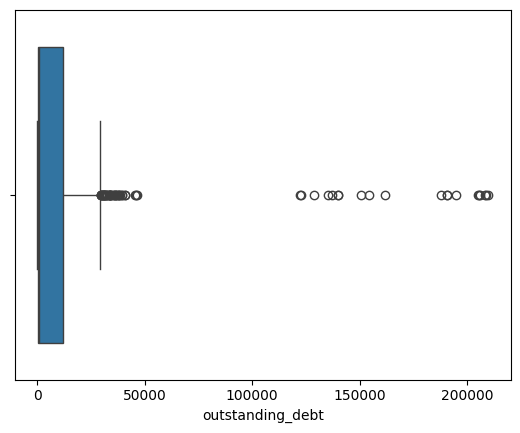

In [23]:
sns.boxplot(x=df_credit_profiles_unique2.outstanding_debt)
plt.show()

In [24]:
df_credit_profiles_unique2[df_credit_profiles_unique2.outstanding_debt>df_credit_profiles_unique2.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-649,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-799,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
301,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-799,60000.0
350,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0


In [25]:
# use loc function get the details by passing condition and replace the outstanding debt with credit limit
df_credit_profiles_unique2.loc[df_credit_profiles_unique2.outstanding_debt>df_credit_profiles_unique2.credit_limit,'outstanding_debt']=df_credit_profiles_unique2['credit_limit']

In [26]:
df_credit_profiles_unique2[df_credit_profiles_unique2.outstanding_debt>df_credit_profiles_unique2.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


In [27]:
# Recalculate the credit_utilisation for records where credit limit is matching with outstanding debt
df_credit_profiles_unique2[df_credit_profiles_unique2['credit_limit']==df_credit_profiles_unique2['outstanding_debt']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,1500.0,3.0,1500.0,600-649,1500.0
25,26,758,0.250811,60000.0,2.0,60000.0,750-799,60000.0
38,39,734,0.573023,40000.0,3.0,40000.0,700-749,40000.0
93,94,737,0.739948,40000.0,2.0,40000.0,700-749,40000.0
204,205,303,0.364360,500.0,0.0,500.0,300-449,500.0
271,272,703,0.446886,40000.0,1.0,40000.0,700-749,40000.0
301,302,722,0.608076,40000.0,4.0,40000.0,700-749,40000.0
330,331,799,0.363420,60000.0,4.0,60000.0,750-799,60000.0
350,351,320,0.285081,500.0,0.0,500.0,300-449,500.0


In [28]:
df_credit_profiles_unique2[df_credit_profiles_unique2['credit_limit']==df_credit_profiles_unique2['outstanding_debt']].shape

(20, 8)

In [29]:
# Update credit_utilisation value to 100 as the customers utilized complete credit limit
mask = df_credit_profiles_unique2['credit_limit'] == df_credit_profiles_unique2['outstanding_debt']
df_credit_profiles_unique2.loc[mask, 'credit_utilisation'] = (
    df_credit_profiles_unique2.loc[mask, 'outstanding_debt'] / df_credit_profiles_unique2.loc[mask, 'credit_limit']
) * 100
df_credit_profiles_unique2.loc[[1,19]]
print(df_credit_profiles_unique2.columns)

Index(['cust_id', 'credit_score', 'credit_utilisation', 'outstanding_debt',
       'credit_inquiries_last_6_months', 'credit_limit', 'credit_score_range',
       'credit_limit_mode'],
      dtype='object')


In [30]:
df_credit_profiles_unique2[df_credit_profiles_unique2['credit_limit']==df_credit_profiles_unique2['outstanding_debt']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,100.0,1250.0,2.0,1250.0,550-599,1250.0
19,20,647,100.0,1500.0,3.0,1500.0,600-649,1500.0
25,26,758,100.0,60000.0,2.0,60000.0,750-799,60000.0
38,39,734,100.0,40000.0,3.0,40000.0,700-749,40000.0
93,94,737,100.0,40000.0,2.0,40000.0,700-749,40000.0
204,205,303,100.0,500.0,0.0,500.0,300-449,500.0
271,272,703,100.0,40000.0,1.0,40000.0,700-749,40000.0
301,302,722,100.0,40000.0,4.0,40000.0,700-749,40000.0
330,331,799,100.0,60000.0,4.0,60000.0,750-799,60000.0
350,351,320,100.0,500.0,0.0,500.0,300-449,500.0


In [31]:
df_credit_profiles_unique2.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,2.490320,6850.084000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,13.938845,10683.473561,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.296921,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.497384,541.500000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.711738,10924.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,100.000000,60000.000000,4.000000,60000.00000,60000.000000


In [32]:
df_credit_profiles_unique2.sample(4)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
449,450,418,0.271416,69.0,2.0,500.0,300-449,500.0
988,989,497,0.762646,295.0,4.0,750.0,450-499,750.0
133,134,328,0.214826,90.0,3.0,500.0,300-449,500.0
754,755,545,0.848028,483.0,3.0,1000.0,500-549,1000.0


In [33]:
df_customer_credit_profile = df_customers.merge(df_credit_profiles_unique2,on='cust_id',how='inner')
df_customer_credit_profile.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,26-48,587,100.000000,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [34]:
#Check the correlation between the numeric columns using corr()
numeric_cols = ['age','annual_income','credit_score','credit_utilisation','outstanding_debt','credit_limit']
correlation_matrix = df_customer_credit_profile[numeric_cols].corr()
correlation_matrix

,age,annual_income,credit_score,credit_utilisation,outstanding_debt,credit_limit
age,1.000000,0.618065,0.444870,0.093966,0.444223,0.510891
annual_income,0.618065,1.000000,0.575685,0.072374,0.555077,0.684627
credit_score,0.444870,0.575685,1.000000,0.037834,0.680654,0.847952
credit_utilisation,0.093966,0.072374,0.037834,1.000000,0.291866,0.048870
outstanding_debt,0.444223,0.555077,0.680654,0.291866,1.000000,0.810581
credit_limit,0.510891,0.684627,0.847952,0.048870,0.810581,1.000000


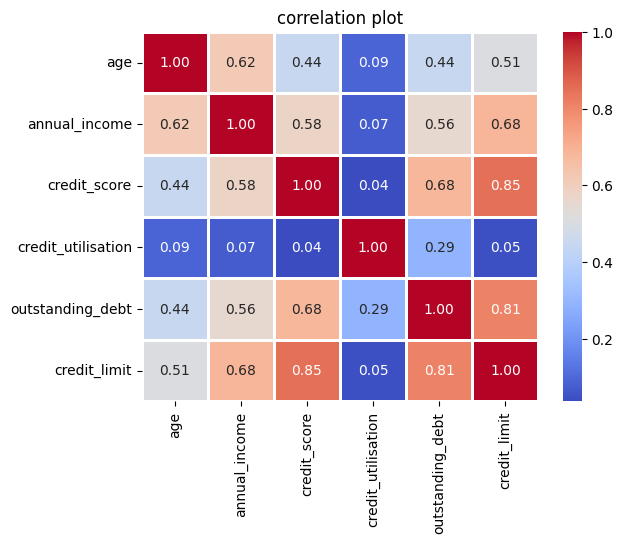

In [35]:
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.9)
plt.title('correlation plot')
plt.show()